<a href="https://www.kaggle.com/code/shaikhabdulrafay03/fer-2013?scriptVersionId=174266391" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten ,BatchNormalization 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers , initializers
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

import tensorflow as tf 


2024-04-27 08:37:18.663336: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-27 08:37:18.663438: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-27 08:37:18.781722: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_dir = '/kaggle/input/fer2013/train'
test_dir = '/kaggle/input/fer2013/test'

In [3]:
# Preprocess
augment = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale = 1./255,
    fill_mode='nearest',
    validation_split = 0.2    
)


val_augment = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2    
)


train_generator = augment.flow_from_directory(
    train_dir,
    target_size=(48 ,48),
    batch_size=32,
    color_mode = "grayscale",
    class_mode='categorical',
    shuffle=True,
    subset = "training"
)

val_generator = augment.flow_from_directory(
    test_dir,
    target_size=(48 ,48),
    batch_size=32,
    color_mode = "grayscale",
    class_mode='categorical',
    shuffle=True,
    subset = "validation"
)



Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [4]:
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_percentage_error
def runmodel(model , BS , LR , eps):
    model.compile(
        optimizer= tf.keras.optimizers.SGD(learning_rate=LR),
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    

    early_stopping = keras.callbacks.EarlyStopping(
        patience=5,
        min_delta=0.01,
        restore_best_weights=True,
    )

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        batch_size=BS,
        steps_per_epoch=len(train_generator),
        epochs=eps,
        validation_steps=len(val_generator),
        callbacks=[early_stopping],
    )

    return history

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    
    Flatten(),
    Dense(256, activation='elu', kernel_initializer='glorot_normal'),
    Dense(128, activation='elu', kernel_initializer='glorot_normal'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,788,743 (6.82 MB)

 Trainable params: 1,787,527 (6.82 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [6]:
h = runmodel(model , BS = 32 , eps = 60 , LR = 0.001)

Epoch 1/60


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-04-27 08:37:45.868815: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.50943, expected 0.828027
2024-04-27 08:37:45.868866: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 2.3861, expected 1.7047
2024-04-27 08:37:45.868875: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.56358, expected 1.88218
2024-04-27 08:37:45.868883: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.00481, expected 1.3234
2024-04-27 08:37:45.868891: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137

  3/718 ━━━━━━━━━━━━━━━━━━━━ 49s 70ms/step - accuracy: 0.1354 - loss: 3.6352   

I0000 00:00:1714207071.123567      81 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714207071.145204      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


362/718 ━━━━━━━━━━━━━━━━━━━━ 43s 122ms/step - accuracy: 0.1933 - loss: 2.5513

2024-04-27 08:38:36.611107: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 0.913074, expected 0.698697
2024-04-27 08:38:36.611169: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 0.916716, expected 0.702339
2024-04-27 08:38:36.611179: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 0.801774, expected 0.587396
2024-04-27 08:38:36.611187: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32: 0.982335, expected 0.767958
2024-04-27 08:38:36.611195: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 191: 0.839342, expected 0.624965
2024-04-27 08:38:36.611206: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 720: 1.0785, expected 0.864118
2024-04-27 08:38:36.611215: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 845: 1.02572, expected 0.811343
2024-04-27 08:38:36.611223: E exte

711/718 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.1966 - loss: 2.4293

W0000 00:00:1714207164.308011      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


718/718 ━━━━━━━━━━━━━━━━━━━━ 109s 138ms/step - accuracy: 0.1966 - loss: 2.4273 - val_accuracy: 0.2409 - val_loss: 1.8422
Epoch 2/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 45us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/60


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


718/718 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step - accuracy: 0.2037 - loss: 2.0529 - val_accuracy: 0.2591 - val_loss: 1.8122
Epoch 4/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 18us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 33s 45ms/step - accuracy: 0.2202 - loss: 1.9377 - val_accuracy: 0.2605 - val_loss: 1.8134
Epoch 6/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step - accuracy: 0.2235 - loss: 1.8881 - val_accuracy: 0.2598 - val_loss: 1.7806


<Axes: title={'center': 'Accuracy'}>

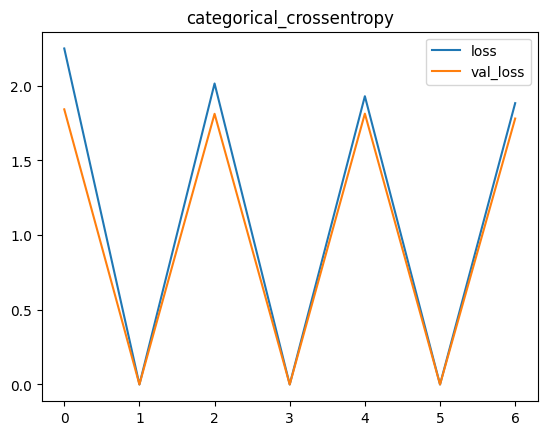

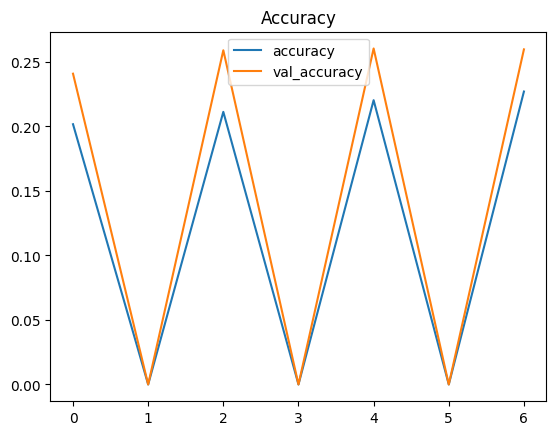

In [7]:
history_df = pd.DataFrame(h.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="categorical_crossentropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [8]:
validation_labels = val_generator.classes
validation_pred_probs = model.predict(val_generator)


 5/45 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step

W0000 00:00:1714207271.189946      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step


In [9]:
from sklearn.metrics import accuracy_score , f1_score
predicted_labels = np.argmax(validation_pred_probs, axis=1)
print('Accuracy: ' ,accuracy_score(validation_labels,predicted_labels))
print('F1 Score: ' ,f1_score(validation_labels,predicted_labels , average = 'weighted') )

Accuracy:  0.19902234636871508
F1 Score:  0.16636939004357837
